In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("./archive/combined_emotion.csv")
df.drop_duplicates(inplace = True)
df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


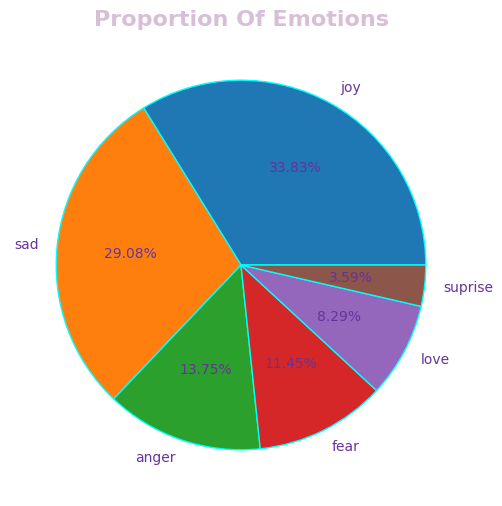

emotion
joy        140779
sad        120989
anger       57235
fear        47664
love        34497
suprise     14959
Name: count, dtype: int64

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize = (6,6))

plt.pie(x = df['emotion'].value_counts(), 
        labels = df['emotion'].value_counts().index.unique(), autopct = '%.2f%%',
        textprops={'color': "rebeccapurple"},  # Set label color to rebeccapurple using textprops 
        wedgeprops = {'linewidth': 1, 'edgecolor': "cyan"}) # Use wedgeprops to set linewidth and edgecolor))
plt.title('Proportion Of Emotions', color = 'thistle', fontsize = 16,
          fontweight = 'bold')
plt.show()
df['emotion'].value_counts()


In [4]:
# Split the data into training and testing sets
X = df["sentence"]
y = df["emotion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)  # Transform training data
X_test_tfidf = vectorizer.transform(X_test)  # Transform test data





In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize and train the Decision Tree classifier
# dt_classifier = RandomForestClassifier(max_features="sqrt",class_weight='balanced',random_state=42)
# dt_classifier.fit(X_train_tfidf, y_train)

# # Make predictions
# y_pred = dt_classifier.predict(X_test_tfidf)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

In [5]:
# Train a Logistic Regression model
model = LogisticRegression(class_weight='balanced',max_iter=500)  # Increase max_iter to avoid convergence issues
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)  # Use transformed test data

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8976990087113247

Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.92      0.90     11448
        fear       0.84      0.85      0.85      9574
         joy       0.97      0.88      0.92     28220
        love       0.72      0.96      0.82      6824
         sad       0.97      0.91      0.94     24121
     suprise       0.65      0.92      0.76      3038

    accuracy                           0.90     83225
   macro avg       0.84      0.91      0.86     83225
weighted avg       0.91      0.90      0.90     83225



In [6]:
# Example Prediction
example_sentences = ["I feel so anxious and afraid", "I am incredibly happy with my progress","im feeling really bad right now"]
example_tfidf = vectorizer.transform(example_sentences)
predictions = model.predict(example_tfidf)

for sentence, emotion in zip(example_sentences, predictions):
    print(f"Sentence: '{sentence}' --> Predicted Emotion: {emotion}")

Sentence: 'I feel so anxious and afraid' --> Predicted Emotion: fear
Sentence: 'I am incredibly happy with my progress' --> Predicted Emotion: joy
Sentence: 'im feeling really bad right now' --> Predicted Emotion: sad


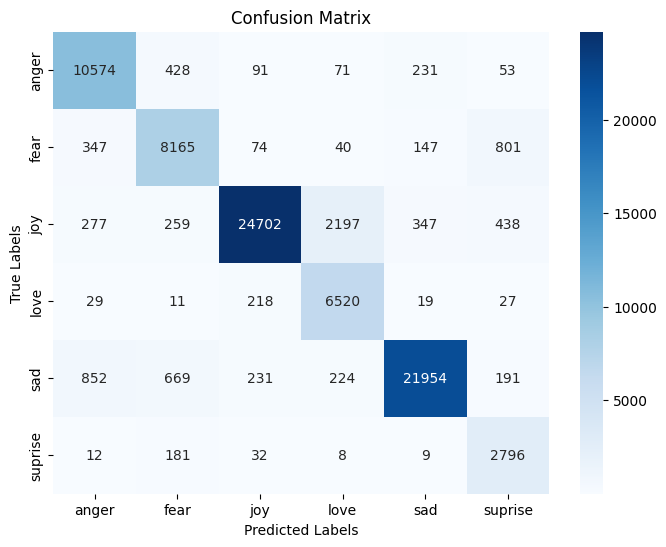

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

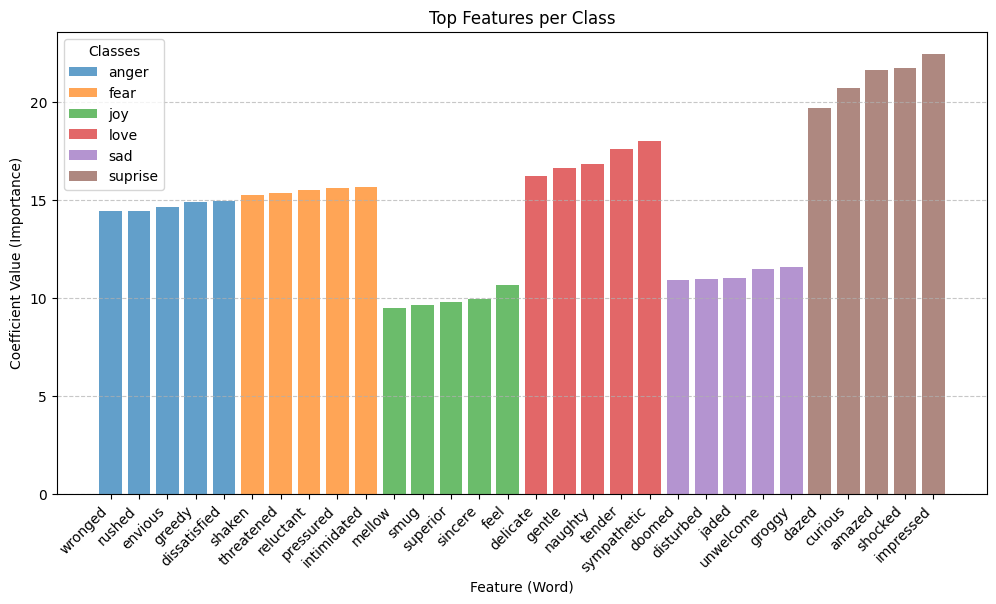

In [8]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()  # Get the feature (word) names
coefficients = model.coef_  # Get coefficients for each class
classes = model.classes_  # Get class labels

top_n = 5  # Number of top features per class
colors = plt.cm.tab10(range(len(classes)))  # Assign unique colors per class

plt.figure(figsize=(12, 6))

for i, class_label in enumerate(classes):
    top_features_idx = np.argsort(coefficients[i])[-top_n:]  # Top features for this class
    top_features = feature_names[top_features_idx]
    top_coefficients = coefficients[i][top_features_idx]

    plt.bar(top_features, top_coefficients, label=class_label, alpha=0.7, color=colors[i])

plt.xticks(rotation=45, ha='right')
plt.title("Top Features per Class")
plt.xlabel("Feature (Word)")
plt.ylabel("Coefficient Value (Importance)")
plt.legend(title="Classes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [9]:
from sklearn.svm import LinearSVC

svm = LinearSVC( class_weight='balanced',max_iter=500,random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm))
print(f'SVM accuracy: {acc_svm}')

              precision    recall  f1-score   support

       anger       0.88      0.91      0.90     11448
        fear       0.83      0.84      0.84      9574
         joy       0.95      0.89      0.92     28220
        love       0.73      0.86      0.79      6824
         sad       0.95      0.92      0.94     24121
     suprise       0.66      0.82      0.73      3038

    accuracy                           0.89     83225
   macro avg       0.83      0.87      0.85     83225
weighted avg       0.90      0.89      0.89     83225

SVM accuracy: 0.8920756984079303


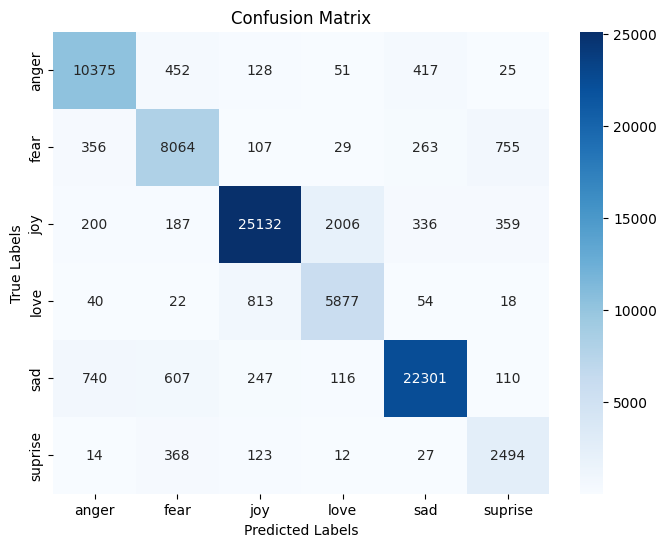

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm, labels=model.classes_)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# # Initialize and train the Decision Tree classifier
# dt_classifier = DecisionTreeClassifier(max_features="sqrt",class_weight='balanced',max_depth=10,random_state=42)
# dt_classifier.fit(X_train_tfidf, y_train)

# # Make predictions
# y_pred = dt_classifier.predict(X_test_tfidf)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(classification_report(y_test, y_pred))